In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
reviews_2022_df = pd.read_parquet("../yelp_reviews.parquet")
businesses_df = pd.read_json('../yelp_dataset/yelp_academic_dataset_business.json', lines=True)

In [5]:
reviews_2022_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


#### Total number of unique businesses in 2022

In [6]:
# Number of businesses with reviews
len(reviews_2022_df.business_id.unique())

150346

#### Distribution of number of reviews per business in 2022

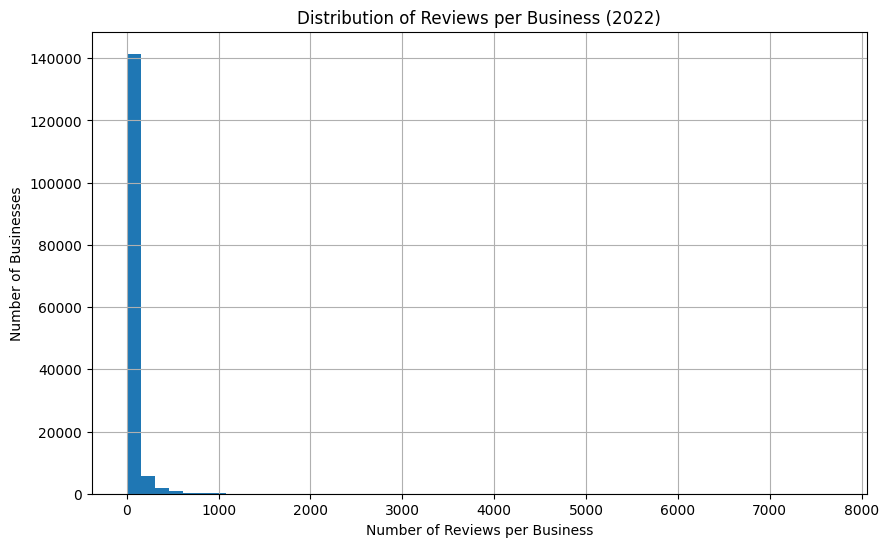

In [7]:
# Count reviews per business, sorted descending
review_counts = reviews_2022_df['business_id'].value_counts(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(review_counts, bins=50)  # Adjust bins as needed
plt.title("Distribution of Reviews per Business (2022)")
plt.xlabel("Number of Reviews per Business")
plt.ylabel("Number of Businesses")
plt.grid(True)
plt.show()

#### Reviews in 2022 are heavily right-tailed

In [8]:
reviews_2022_df['business_id'].value_counts().describe()

count    150346.000000
mean         46.494619
std         124.519061
min           5.000000
25%           8.000000
50%          15.000000
75%          38.000000
max        7673.000000
Name: count, dtype: float64

#### Total number of unique businesses in entire dataset (2015-2022)

In [9]:
businesses_df.shape[0]

150346

In [18]:
businesses_df[businesses_df.name.str.strip().str.lower() == 'datz']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
82231,4U8tToDb49xGDzWfn5TPaA,Datz,6264 Winthrop Town Centre Ave,Riverview,FL,33578,27.892032,-82.317037,3.5,185,1,"{'RestaurantsTableService': 'True', 'BusinessA...","Salad, Burgers, Bars, Nightlife, Restaurants, ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
137449,QHWYlmVbLC3K6eglWoHVvA,Datz,2616 S MacDill Ave,Tampa,FL,33629,27.921942,-82.493253,4.0,3260,1,"{'RestaurantsAttire': 'u'casual'', 'BusinessAc...","Burgers, Bars, Restaurants, American (Traditio...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."


#### Total number of unique businesses in entire dataset (2015-2022) per state

In [31]:
businesses_df['state'].value_counts().sort_values(ascending=False)

state
PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

#### States with the most number of reviews

In [13]:
businesses_df.groupby('state')['review_count'].sum().sort_values(ascending=False)

state
PA     1540790
FL     1119926
LA      743176
TN      598195
MO      483897
IN      472565
AZ      412639
NV      409950
CA      339637
NJ      249837
ID      152086
AB      105477
DE       67370
IL       49676
MA          43
SD          42
TX          33
HI          32
CO          30
NC          29
UT          19
WA          19
VI          10
VT          10
MI           9
MT           6
XMS          5
Name: review_count, dtype: int64

#### Businesses with the most reviews

In [14]:
top_businesses = businesses_df.sort_values('review_count', ascending=False).head(50)
top_businesses[['name', 'city', 'state', 'categories', 'review_count', 'stars']].head()

,name,city,state,categories,review_count,stars
113731,Acme Oyster House,New Orleans,LA,"Live/Raw Food, Seafood, Restaurants, Cajun/Creole",7568,4.0
112552,Oceana Grill,New Orleans,LA,"Restaurants, Seafood, Cajun/Creole, Breakfast ...",7400,4.0
91757,Hattie B’s Hot Chicken - Nashville,Nashville,TN,"American (Traditional), Chicken Shop, Southern...",6093,4.5
143157,Reading Terminal Market,Philadelphia,PA,"Candy Stores, Shopping, Department Stores, Fas...",5721,4.5
147081,Ruby Slipper - New Orleans,New Orleans,LA,"Restaurants, American (Traditional), American ...",5193,4.5


In [17]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)
businesses_df.groupby(['name', 'business_id'])['review_count'].sum().reset_index().sort_values('review_count', ascending=False)

,name,business_id,review_count
3288,Acme Oyster House,_ab50qdWOk0DdB6XOrBitw,7568
90505,Oceana Grill,ac1AeYqs8Z4_e2X5M3if2A,7400
56813,Hattie B’s Hot Chicken - Nashville,GXFMD0Z4jEVZBCsbPf4CTQ,6093
104577,Reading Terminal Market,ytynqOUb3hjKeJfRj5Tshw,5721
109186,Ruby Slipper - New Orleans,oBNrLz4EDhiscSlbOl8uAw,5193
85017,Mother's Restaurant,iSRTaT9WngzB8JJ2YKJUig,5185
109007,Royal House,VQcCL9PiNL_wkGf-uF3fjg,5070
30402,Commander's Palace,_C7QiQQc47AOEv4PE3Kong,4876
76073,Luke,GBTPC53ZrG1ZBY3DT8Mbcw,4554
29716,Cochon,6a4gLLFSgr-Q6CZXDLzBGQ,4421


#### Businesses with the most reviews in 2022

In [69]:
reviews_businesses_2022_df = reviews_2022_df.merge(
    businesses_df,
    on="business_id",
    how="left",  # keep all reviews, even if business info missing
    suffixes=("_review", "_business")
)

In [70]:
top_businesses = (
    reviews_businesses_2022_df
    .groupby(['business_id', 'name'])                # group by unique business
    .size()                                          # count reviews per business
    .reset_index(name='review_count')                # rename the count column
    .sort_values('review_count', ascending=False)    # sort descending
)

# View the top 10
top_businesses.head(10)

,business_id,name,review_count
11479,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,56
1297,3IUg1tfMbxq6a10WSiK9wQ,Elite Experience: Bright Ice,43
15751,p76UGLhyXLxUZij1MUsFBA,2022 Boba and Badges with Ni Hao Tea,41
18665,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,30
4945,FEXhWNCMkv22qG04E83Qjg,Café Du Monde,28
15465,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,27
8732,SJIQFKTW6uUsOo29w9IHxw,Mambo's,25
9963,WVNkMz4sEl35swjVtKHOFw,Alessia Patisserie & Cafe,24
9617,VItkA7pL82rCZdxHH8vBGA,Elite Experience: Lunch Training Preview at honeygrow Wynnewood,24
8807,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,23


In [74]:
businesses_df[businesses_df.name == 'Oceana Grill']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,1,"{'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsAttire': ''casual'', 'GoodForKids': 'True', 'BusinessAcceptsCreditCards': 'True', 'BYOBCorkage': ''no'', 'RestaurantsTableService': 'True', 'RestaurantsReservations': 'True', 'Alcohol': 'u'full_bar'', 'OutdoorSeating': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'HasTV': 'True', 'BYOB': 'False', 'RestaurantsTakeOut': 'True', 'BikeParking': 'True', 'WheelchairAccessible': 'True', 'HappyHour': 'True', 'NoiseLevel': 'u'average'', 'GoodForMeal': '{'dessert': None, 'latenight': None, 'lunch': True, 'dinner': True, 'brunch': None, 'breakfast': None}', 'Ambience': '{'touristy': True, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}', 'Caters': 'True', 'ByAppointmentOnly': 'False', 'DriveThru': 'False', 'DogsAllowed': 'True', 'WiFi': 'u'free''}","Restaurants, Seafood, Cajun/Creole, Breakfast & Brunch","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'Wednesday': '8:0-1:0', 'Thursday': '8:0-1:0', 'Friday': '8:0-1:0', 'Saturday': '8:0-1:0', 'Sunday': '8:0-1:0'}"
